<a href="https://colab.research.google.com/github/Ragul-MFAI/Big_mart-_Sales_prediction/blob/Version2/Big_mart_sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


importing libraries


In [ ]:
#changes have been made

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('Dataset goes here')

In [ ]:
data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
2190,FDX38,10.500,Regular,0.048282,Dairy,49.6376,OUT049,1999,Medium,Tier 1,Supermarket Type1
5379,DRD49,NaN,Low Fat,0.167018,Soft Drinks,237.9564,OUT027,1985,Medium,Tier 3,Supermarket Type3
3914,DRD25,6.135,Low Fat,0.078906,Soft Drinks,112.3860,OUT013,1987,High,Tier 3,Supermarket Type1
2969,DRH51,17.600,Low Fat,0.097613,Dairy,88.1856,OUT018,2009,Medium,Tier 3,Supermarket Type2
1564,NCP18,NaN,Low Fat,0.050072,Household,152.4708,OUT019,1985,Small,Tier 1,Grocery Store


Finding shape of the data

In [ ]:
data.shape

(5681, 11)

Describing the dataset to know more about it

In [ ]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


Checking for null values

In [ ]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Checking Duplicates


In [ ]:
data.duplicated().any()

False

Handling missing values



In [ ]:
data['Item_Weight'] #numerical

0       20.750
1        8.300
2       14.600
3        7.315
4          NaN
         ...  
5676    10.500
5677     7.600
5678    10.000
5679    15.300
5680     9.500
Name: Item_Weight, Length: 5681, dtype: float64

In [ ]:
data['Outlet_Size'] #categorial

0       Medium
1          NaN
2          NaN
3          NaN
4       Medium
         ...  
5676     Small
5677    Medium
5678       NaN
5679       NaN
5680       NaN
Name: Outlet_Size, Length: 5681, dtype: object

implementing univariate imputation

In [ ]:
mean_weight = data['Item_Weight'].mean()
median_weight= data['Item_Weight'].median()

In [ ]:
print(mean_weight)
print(median_weight)

12.695633368756642
12.5


In [ ]:
data['Item_Weight_mean'] = data['Item_Weight'].fillna(mean_weight)
data['Item_Weight_median'] = data['Item_Weight'].fillna(median_weight)

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_mean,Item_Weight_median
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,20.750000,20.750
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,8.300000,8.300
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,14.600000,14.600
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,7.315000,7.315
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,12.695633,12.500


In [ ]:
print("Original Weight variable variance",data['Item_Weight'].var())
print("Item Weight variance after mean imputation",data['Item_Weight_mean'].var())
print("Item Weight variance after median imputation",data['Item_Weight_median'].var())

Original Weight variable variance 21.760812343231528
Item Weight variance after mean imputation 18.021630503972027
Item Weight variance after median imputation 18.027077062656037


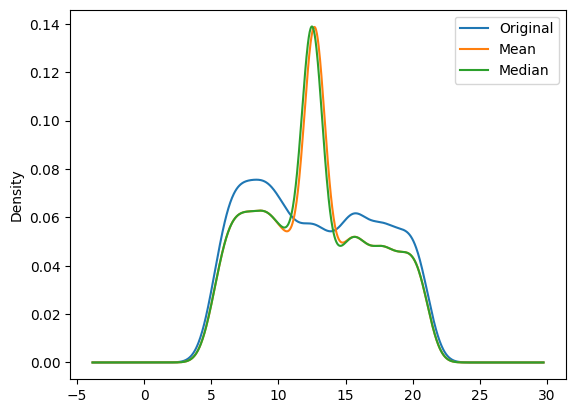

In [ ]:
data['Item_Weight'].plot(kind = "kde",label="Original")

data['Item_Weight_mean'].plot(kind = "kde",label = "Mean")

data['Item_Weight_median'].plot(kind = "kde",label = "Median")

plt.legend()
plt.show()

<Axes: >

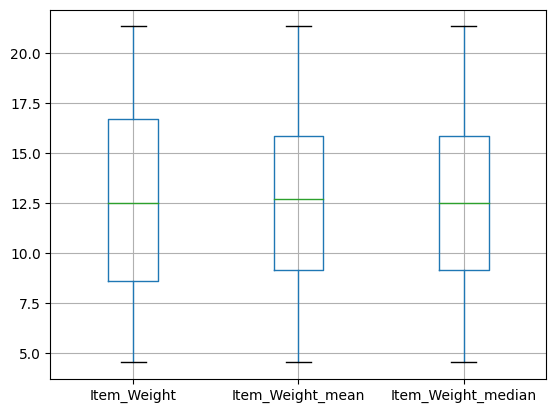

In [ ]:
data[['Item_Weight','Item_Weight_mean','Item_Weight_median']].boxplot()

As they have to much variance , using Interpolation method to handle missing values


In [ ]:
data['Item_Weight_interploate']=data['Item_Weight'].interpolate(method="linear")


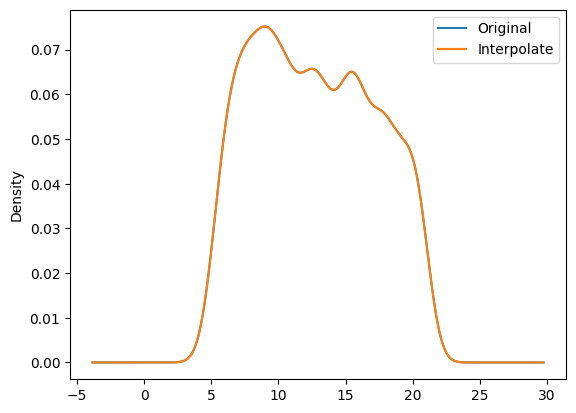

In [ ]:
data['Item_Weight'].plot(kind = "kde",label="Original")
data['Item_Weight_interploate'].plot(kind = "kde",label = "Interpolate")
plt.legend()
plt.show()

In [ ]:
# Check if the columns exist before dropping
if {'Item_Weight', 'Item_Weight_mean', 'Item_Weight_median'}.issubset(data.columns):
    data = data.drop(['Item_Weight','Item_Weight_mean','Item_Weight_median'], axis=1)
    print("Columns dropped successfully.")
else:
    print("One or more columns not found in the DataFrame.")

Columns dropped successfully.


In [ ]:
data.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
Item_Weight_interploate         0
dtype: int64

In [ ]:
data['Outlet_Size'].value_counts()

Outlet_Size
Medium    1862
Small     1592
High       621
Name: count, dtype: int64

In [ ]:
data['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: count, dtype: int64

In [ ]:
mode_outlet = data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))
mode_outlet

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [ ]:
missing_values = data['Outlet_Size'].isnull()
print(missing_values)

0       False
1        True
2        True
3        True
4       False
        ...  
5676    False
5677    False
5678     True
5679     True
5680     True
Name: Outlet_Size, Length: 5681, dtype: bool


In [ ]:
data.loc[missing_values,'Outlet_Size'] = data.loc[missing_values,'Outlet_Type'].apply(lambda x :mode_outlet[x])
data.isnull().sum()


Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Weight_interploate      0
dtype: int64

In [ ]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Weight_interploate'],
      dtype='object')

In [ ]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: count, dtype: int64

In [ ]:
data.replace({'Item_Fat_Content':{'Low Fat':'LF','low fat':'LF','Regular':'Reg'}},inplace=True)

In [ ]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
LF     3668
Reg    2013
Name: count, dtype: int64

In [ ]:
data['Item_Visibility'].value_counts()

Item_Visibility
0.000000    353
0.060879      2
0.097213      2
0.058461      2
0.058132      2
           ... 
0.082382      1
0.026175      1
0.155144      1
0.069557      1
0.104720      1
Name: count, Length: 5277, dtype: int64

In [ ]:
data['Item_Visibility_interpolate']=data['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')

In [ ]:
data.head(2)


,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interploate,Item_Visibility_interpolate
0,FDW58,LF,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,20.75,0.007565
1,FDW14,Reg,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,8.30,0.038428


In [ ]:
data['Item_Visibility_interpolate'].value_counts()

Item_Visibility_interpolate
0.093531    2
0.072816    2
0.202948    2
0.107493    2
0.112131    2
           ..
0.089452    1
0.133171    1
0.103428    1
0.073685    1
0.104720    1
Name: count, Length: 5629, dtype: int64

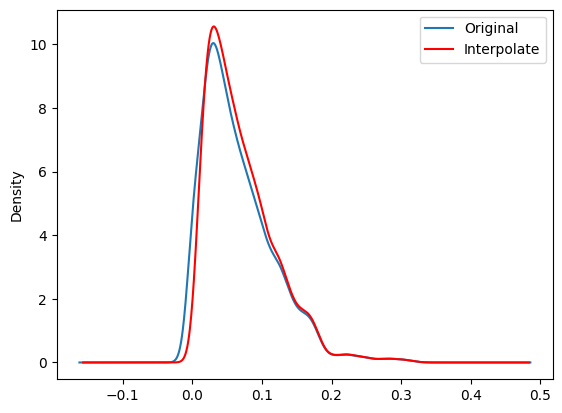

In [ ]:
data['Item_Visibility'].plot(kind="kde",label="Original")

data['Item_Visibility_interpolate'].plot(kind="kde",color='red',label="Interpolate")

plt.legend()
plt.show()

In [ ]:
data = data.drop('Item_Visibility',axis=1)

In [ ]:
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interploate,Item_Visibility_interpolate
0,FDW58,LF,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,20.75,0.007565


In [ ]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Weight_interploate',
       'Item_Visibility_interpolate'],
      dtype='object')

In [ ]:
data['Item_Type'].value_counts()

Item_Type
Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: count, dtype: int64

In [ ]:
data['Item_Identifier'].value_counts().sample(5)

Item_Identifier
FDP44    3
FDV14    6
FDC40    3
NCK07    2
FDQ16    4
Name: count, dtype: int64

In [ ]:
data['Item_Identifier'] =data['Item_Identifier'].apply(lambda x : x[:2])

In [ ]:
data['Item_Identifier'].value_counts()

Item_Identifier
FD    4076
NC    1087
DR     518
Name: count, dtype: int64

In [ ]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Weight_interploate',
       'Item_Visibility_interpolate'],
      dtype='object')

In [ ]:
data['Outlet_Establishment_Year']

0       1999
1       2007
2       1998
3       2007
4       1985
        ... 
5676    1997
5677    2009
5678    2002
5679    2007
5680    2002
Name: Outlet_Establishment_Year, Length: 5681, dtype: int64

In [ ]:
import datetime as dt
current_year = dt.datetime.today().year
data['Outlet_age']= current_year - data['Outlet_Establishment_Year']
data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
0,FD,LF,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,20.7500,0.007565,25
1,FD,Reg,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,8.3000,0.038428,17
2,NC,LF,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store,14.6000,0.099575,26
3,FD,LF,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,7.3150,0.015388,17
4,FD,Reg,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,8.5575,0.118599,39


In [ ]:
data = data.drop('Outlet_Establishment_Year',axis=1)

In [ ]:
data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
0,FD,LF,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,20.7500,0.007565,25
1,FD,Reg,Dairy,87.3198,OUT017,Small,Tier 2,Supermarket Type1,8.3000,0.038428,17
2,NC,LF,Others,241.7538,OUT010,Small,Tier 3,Grocery Store,14.6000,0.099575,26
3,FD,LF,Snack Foods,155.0340,OUT017,Small,Tier 2,Supermarket Type1,7.3150,0.015388,17
4,FD,Reg,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,8.5575,0.118599,39


Handling categorial values

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

data_encoded = data.copy()

cat_cols = data.select_dtypes(include=['object']).columns

for col in cat_cols:
    oe = OrdinalEncoder()
    data_encoded[col]=oe.fit_transform(data_encoded[[col]])
    print(oe.categories_)

[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['LF', 'Reg'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [ ]:
data_encoded.head(3)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
0,1.0,0.0,13.0,107.8622,9.0,1.0,0.0,1.0,20.75,0.007565,25
1,1.0,1.0,4.0,87.3198,2.0,2.0,1.0,1.0,8.30,0.038428,17
2,2.0,0.0,11.0,241.7538,0.0,2.0,2.0,0.0,14.60,0.099575,26
